In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pylab as plt
import folium
from folium import plugins
from shapely.geometry import Point

# Read the dataset

In [3]:
df = pd.read_parquet('data/geolife_trajectories_1_3.parquet')
print(df.shape[0])
df.head()

24876978


,lat,lon,datetime,altitude_meters,tripId,userId
0,39.957560,116.318203,2008-11-06 01:47:09,82.99704,018_20081106014709,018
1,39.957568,116.318198,2008-11-06 01:47:10,82.99704,018_20081106014709,018
2,39.957668,116.318235,2008-11-06 01:47:15,82.99704,018_20081106014709,018
3,39.957762,116.318218,2008-11-06 01:47:22,82.99704,018_20081106014709,018
4,39.957843,116.318258,2008-11-06 01:47:26,82.99704,018_20081106014709,018


In [4]:
df.dtypes

lat                       float64
lon                       float64
datetime           datetime64[ns]
altitude_meters           float64
tripId                     object
userId                     object
dtype: object

## Convert to a geopandas dataframe

In [5]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(x=df.lon, y=df.lat))
print(gdf.shape[0])
gdf.head()

## Make smaller datasets for inefficient plottting tools

In [9]:
df_small  = df.head(5000)
gdf_small = gdf.head(5000)

## Native GeoPandas plotting

In [23]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [22]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


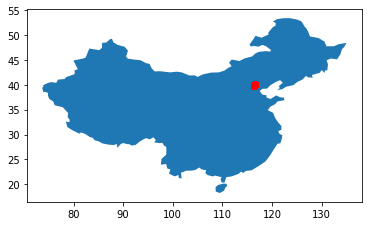

In [38]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Get the outline of China
ax = world[world.name == 'China'].plot()
gdf_small.plot(ax=ax, color='red')

## matplotlib

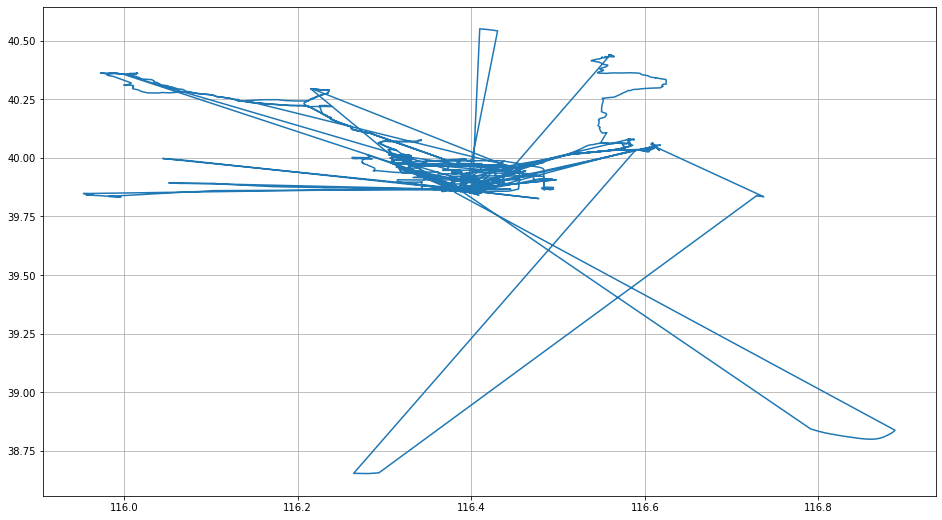

In [4]:
plt.figure(figsize = (16, 9))
plt.plot(df_small.lon, df_small.lat)
plt.grid()

## cartopy (basemap is depreceated)

In [45]:
#import cartopy.crs as ccrs
#import matplotlib.pyplot as plt

#ax = plt.axes(projection=ccrs.PlateCarree())
#ax.stock_img()

#df_plot = df.sample(1000)
#print(df_plot)

#plt.plot(df_plot['lon'].tolist(), df_plot['lat'].tolist(),
#         color='blue', linewidth=2, marker='o',
#         transform=ccrs.Geodetic(),
#         )


## folium

In [5]:
m = folium.Map() # m = folium.Map([22.813473, 108.333078], zoom_start=15) or use m.fit_bounds(m.get_bounds())

# Select 10 trips
trips = df.tripId.unique().tolist()[2:3]

for trip in trips:
    df_plot = df[df.tripId == trip]

    # Format data as a list of tupples
    line_data = list(df_plot[['lat', 'lon']].itertuples(index=False, name=None))
    line = folium.PolyLine(line_data, weight=15).add_to(m)

m.fit_bounds(m.get_bounds())
#m.save('data/folium_simple_line.html')
m

In [6]:
m = folium.Map()

for trip in trips:
    df_plot = df[df.tripId == trip]

    # Format data as a list of tupples
    line_data = list(df_plot[['lat', 'lon']].itertuples(index=False, name=None))

    # Plot the line
    folium.plugins.AntPath(locations=line_data, reverse='True', dash_array=[20, 30]).add_to(m)

m.fit_bounds(m.get_bounds())
m